# Benchmarking Global Forecasting Models

### Recap Advantages / Disadvantages Time Series Foundation Models

![](./img/advantages_disadvantages.png)







![](./img/motivation_benchmarking.png)


## Requirements

![](./img/requirements_benchmarking.png)

## Benchmarking Module in sktime

<style>
table th:first-of-type {
    width: 20%;
}
table th:nth-of-type(2) {
    width: 40%;
}
table th:nth-of-type(3) {
    width: 20%;
}
</style>

| Add estimator  <br /> E.g. ChronosForecaster() | ![](./img/sktime_benchmarking.png) |  Add task  <br /> dataset loader   <br /> Cross Validation  <br /> Global Cross Validation  <br /> Global Temporal Cross Validation  <br /> Scoring Metrics| 
:-----------------:|:-------------------------:|:-------------------------:


In [1]:
from sktime.benchmarking.forecasting import ForecastingBenchmark
from sktime.performance_metrics.forecasting import MeanAbsoluteError, MeanSquaredError
from sktime.split import SingleWindowSplitter, InstanceSplitter
from sktime.datasets import load_forecastingdata 
from sklearn.model_selection import KFold


## Data loader

In [2]:
def dataset_loader():
    data = load_forecastingdata("australian_electricity_demand_dataset", return_type="pd_multiindex_hier")[0]
    data = data[data.index.get_level_values(-1) <  "2009.01.01"]
    data.index = data.index.droplevel(0)
    return data


## Cross Validation
* cv is a SingleWindowSplitter, this cv splits the time series into two pieces
    * the context, which is passed to the forecaster
    * the ground truth, which should be forecasted (determined by `fh=range(48)`)
* cv_global is an InstanceSplitter, it splits the time series into two sets:
    * known time series that might be used for training global forecasting models. The used time series foundation models will ignore these time series in this benchmark.
    * unknown time series, which will be splitted into context and values to be predicted.
* cv_temporal_global which is a SingleWindowSplitter, it determines the cutoff point which is synced across the known and unknown time series to avoid temporal data leakage between both sets.

![](./img/split_explanation.png)


### Visualise the splits (TODO Remove it not merged!)

(<Figure size 1600x1500 with 10 Axes>,
 array([[<Axes: xlabel='timestamp'>,
         <Axes: title={'center': 'NSW'}, xlabel='timestamp'>],
        [<Axes: xlabel='timestamp'>,
         <Axes: title={'center': 'VIC'}, xlabel='timestamp'>],
        [<Axes: xlabel='timestamp'>,
         <Axes: title={'center': 'QUN'}, xlabel='timestamp'>],
        [<Axes: xlabel='timestamp'>,
         <Axes: title={'center': 'SA'}, xlabel='timestamp'>],
        [<Axes: xlabel='timestamp'>,
         <Axes: title={'center': 'TAS'}, xlabel='timestamp'>]],
       dtype=object))

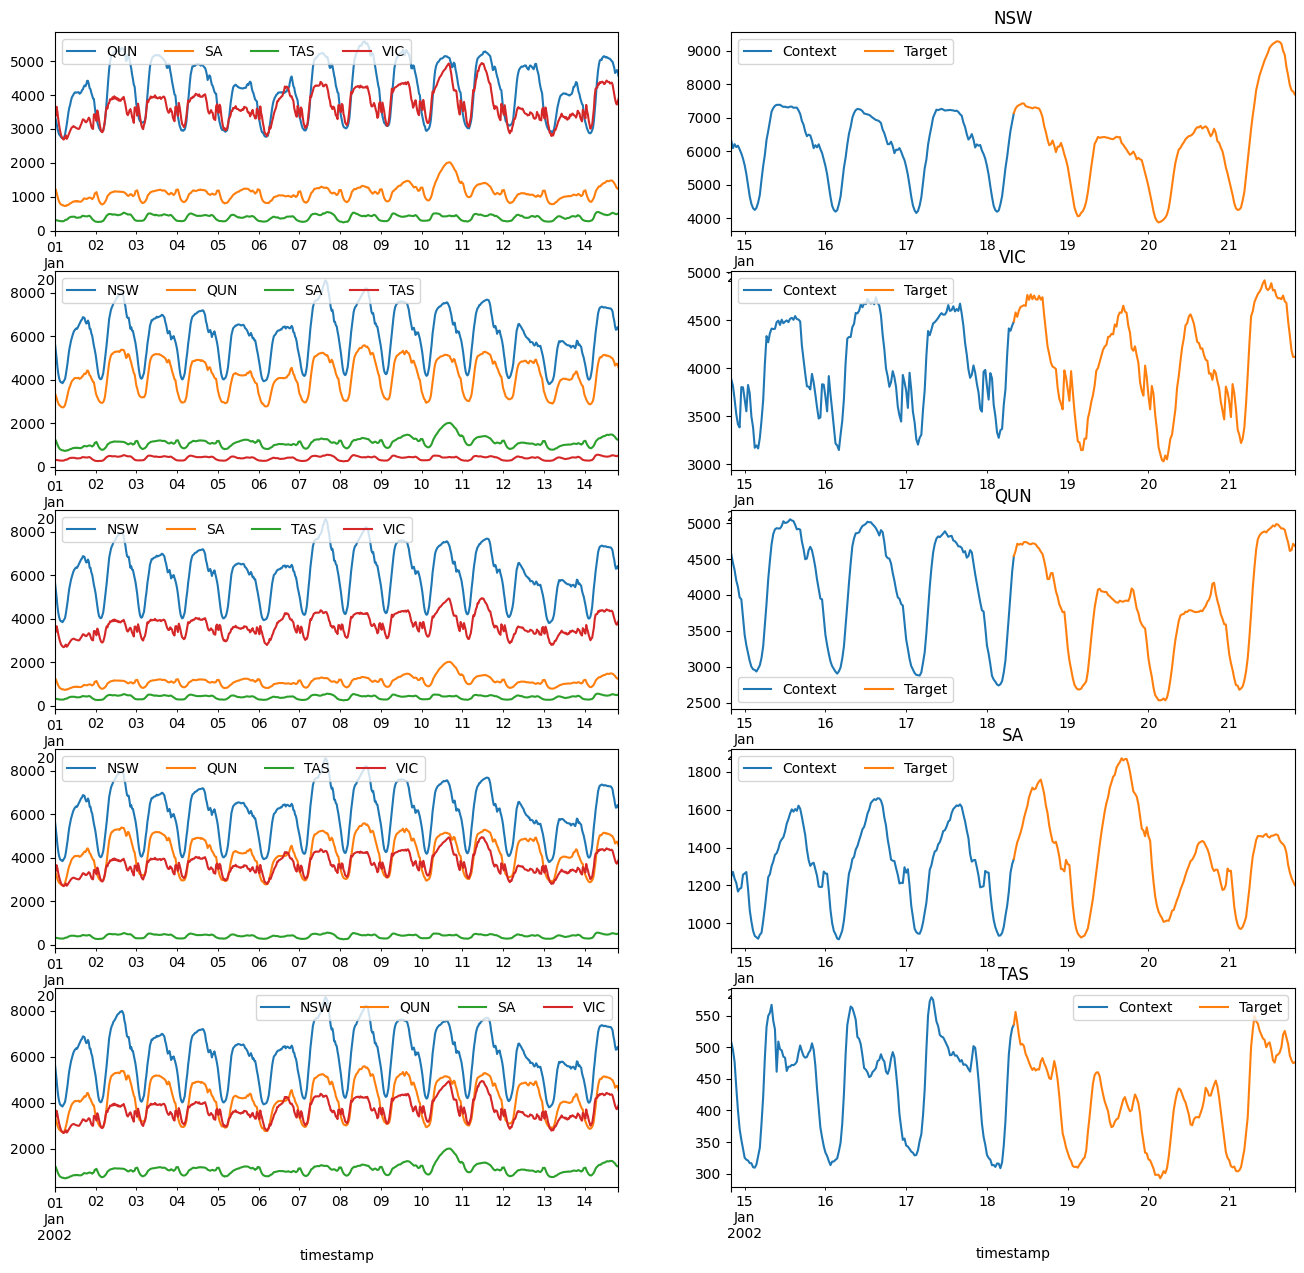

In [3]:

# We need to release this method!
from sktime.utils.plotting import plot_folds_global_forecasting


data = dataset_loader()
data = data[data.index.get_level_values(-1) < data.index.get_level_values(-1)[1000]]

cv = SingleWindowSplitter(fh=range(168))
cv_global = InstanceSplitter(KFold(5))#
cv_temporal_global = SingleWindowSplitter(fh=range(168*2))

plot_folds_global_forecasting(
    cv,
    cv_global,
    cv_temporal_global,
    data,
)



## Metrics

* Metrics are first class citizen in sktime. I.e., they are classes with a tag system and are searchable. 
* located in `sktime.performance_metrics.forecasting`
* Probabilistic/Point Forecasting metric.
* Based on the chosen metric, the benchmarking module decides if a probabilistic or a point forecast should be evaluated.


In [4]:
from sktime.performance_metrics.forecasting import MeanAbsoluteError

from sktime.registry import all_estimators

all_estimators("metric", as_dataframe=True)


/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


,name,object
0,AUCalibration,<class 'sktime.performance_metrics.forecasting...
1,CRPS,<class 'sktime.performance_metrics.forecasting...
2,ConstraintViolation,<class 'sktime.performance_metrics.forecasting...
3,DetectionCount,<class 'sktime.performance_metrics.detection._...
4,DirectedChamfer,<class 'sktime.performance_metrics.detection._...
5,DirectedHausdorff,<class 'sktime.performance_metrics.detection._...
6,EmpiricalCoverage,<class 'sktime.performance_metrics.forecasting...
7,GeometricMeanAbsoluteError,<class 'sktime.performance_metrics.forecasting...
8,GeometricMeanRelativeAbsoluteError,<class 'sktime.performance_metrics.forecasting...
9,GeometricMeanRelativeSquaredError,<class 'sktime.performance_metrics.forecasting...


## Create a Forecasting Benchmark with global forecasters

In [5]:
benchmark = ForecastingBenchmark()

## Add tasks
* 5 splits (each time series will be a test time series once)
* Two metrics
    * Root mean squared error (`MeanSquaredError(square_root=True)`)
    * Mean absolute error with forecast horizon based evaluation (`MeanAbsoluteError(by_index=True)`)
* In case of a failing forecast, the benchmark should raise an exception (`error_score="raise"`).

In [6]:

benchmark.add_task(
        dataset_loader,
        SingleWindowSplitter(fh=range(1, 48)),
        [MeanSquaredError(square_root=True), MeanAbsoluteError(by_index=True)],
        cv_global=InstanceSplitter(KFold(5)),
        cv_global_temporal=SingleWindowSplitter(fh=range(48*24)),
        error_score="raise"
    )

## Add estimators

In [7]:
from sktime.forecasting.moirai_forecaster import MOIRAIForecaster
from sktime.forecasting.ttm import TinyTimeMixerForecaster
from sktime.forecasting.chronos import ChronosForecaster
from sktime.forecasting.pytorchforecasting import PytorchForecastingNBeats


In [8]:
benchmark.add_estimator(
    ChronosForecaster("amazon/chronos-bolt-tiny"), estimator_id="chronos_bolt"
)
benchmark.add_estimator(
    ChronosForecaster("amazon/chronos-bolt-base"), estimator_id="chronos_base"
)
benchmark.add_estimator(
    TinyTimeMixerForecaster()
)
benchmark.add_estimator(
    MOIRAIForecaster(checkpoint_path=f"sktime/moirai-1.0-R-small"), estimator_id="moirai_small"
)
benchmark.add_estimator(
    MOIRAIForecaster(checkpoint_path=f"sktime/moirai-1.0-R-large"), estimator_id="moirai_large"
)
# benchmark.add_estimator(
#     PytorchForecastingNBeats(trainer_params={'max_epochs': 5})
# )

/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [9]:
results = benchmark.run("energy_benchmarking.json")

/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/benediktheidrich/code/tutorial_haicon_prologue_2025/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warning

In [10]:
results.columns

Index(['validation_id', 'model_id', 'MeanSquaredError_fold_0_test',
       'MeanSquaredError_fold_1_test', 'MeanSquaredError_fold_2_test',
       'MeanSquaredError_fold_3_test', 'MeanSquaredError_fold_4_test',
       'MeanSquaredError_mean', 'MeanSquaredError_std',
       'MeanAbsoluteError_fold_0_test', 'MeanAbsoluteError_fold_1_test',
       'MeanAbsoluteError_fold_2_test', 'MeanAbsoluteError_fold_3_test',
       'MeanAbsoluteError_fold_4_test', 'MeanAbsoluteError_mean',
       'MeanAbsoluteError_std', 'fit_time_fold_0_test', 'fit_time_fold_1_test',
       'fit_time_fold_2_test', 'fit_time_fold_3_test', 'fit_time_fold_4_test',
       'fit_time_mean', 'fit_time_std', 'pred_time_fold_0_test',
       'pred_time_fold_1_test', 'pred_time_fold_2_test',
       'pred_time_fold_3_test', 'pred_time_fold_4_test', 'pred_time_mean',
       'pred_time_std', 'runtime_secs'],
      dtype='object')

<Axes: title={'center': 'Mean Squared Error'}, xlabel='model_id'>

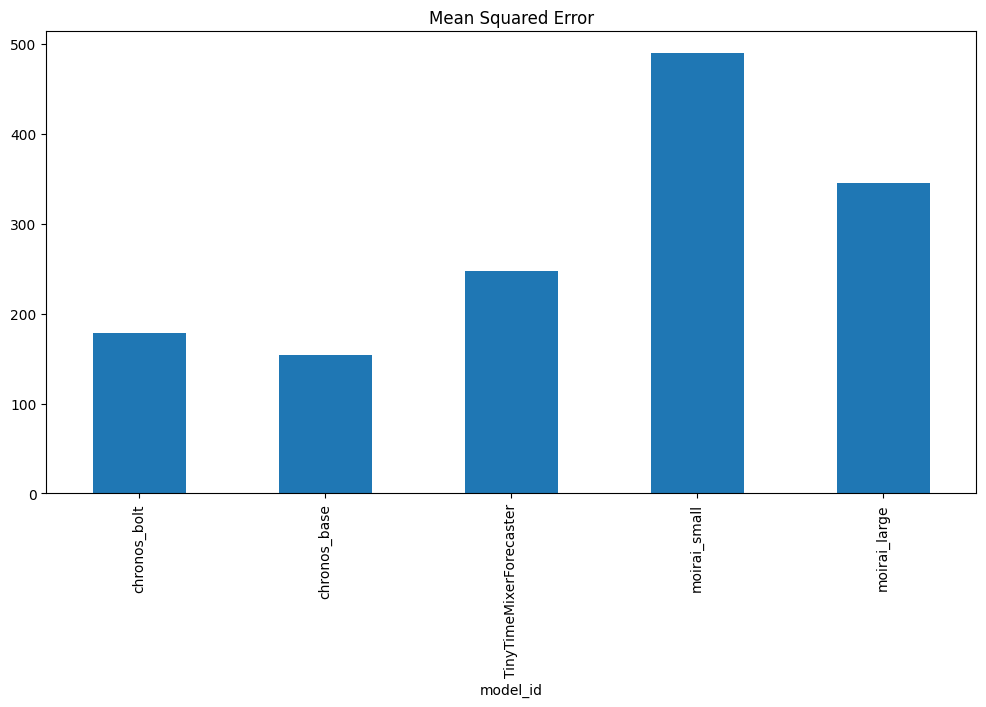

In [11]:
results.set_index("model_id")["MeanSquaredError_mean"].plot.bar(title="Mean Squared Error", figsize=(12, 6))


<Axes: title={'center': 'Run Times'}, xlabel='model_id'>

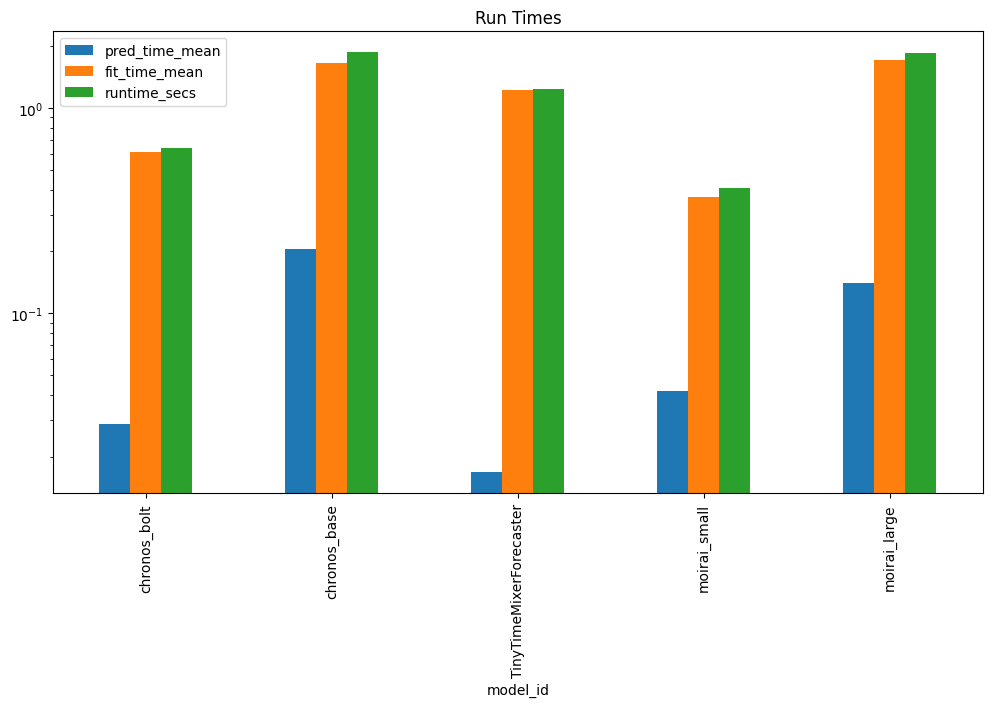

In [12]:
results.set_index("model_id")[["pred_time_mean", "fit_time_mean", "runtime_secs"]].plot.bar(title="Run Times", figsize=(12, 6), logy=True)

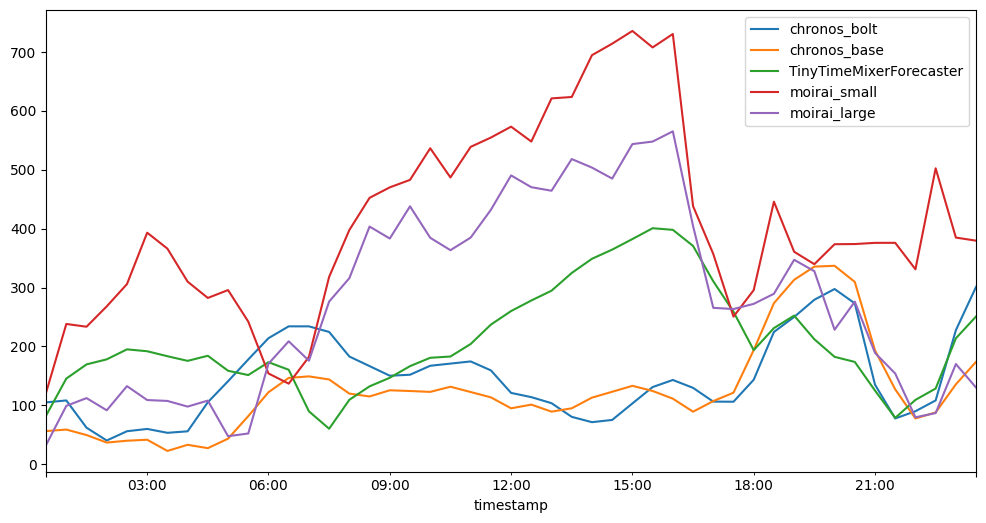

In [13]:
import matplotlib.pyplot as plt
legends = []
for model, row in results[["model_id", "MeanAbsoluteError_mean"]].set_index("model_id").iterrows():
    legends.append(model)
    row["MeanAbsoluteError_mean"].plot(figsize=(12, 6))
plt.legend(legends)
plt.show()